<a href="https://colab.research.google.com/github/sana-f-shah/Solar-Panel-Analytics/blob/main/notebooks/1a_eda_and_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
import pandas as pd
import numpy as np

data = "/content/drive/MyDrive/Portfolio/Solar Panel Analytics/Weather Data 2014-11-30.xlsx"

df = pd.read_excel(data)

df.replace('---', np.nan, inplace=True)

df.to_parquet('/content/drive/MyDrive/Portfolio/Solar Panel Analytics/data.parquet', index=False)
"""

'\nimport pandas as pd\nimport numpy as np\n\ndata = "/content/drive/MyDrive/Portfolio/Solar Panel Analytics/Weather Data 2014-11-30.xlsx"\n\ndf = pd.read_excel(data)\n\ndf.replace(\'---\', np.nan, inplace=True)\n\ndf.to_parquet(\'/content/drive/MyDrive/Portfolio/Solar Panel Analytics/data.parquet\', index=False)\n'

In [ ]:
import pandas as pd

df = pd.read_parquet('/content/drive/MyDrive/Portfolio/Solar Panel Analytics/data.parquet')

In [ ]:
df.head()

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,YMCA,2014-01-07,1,14:30:00,14,10.6,10.6,10.4,84.0,8.0,...,50,6.8,16.3,9.39,0.0739,0.00,385,1,56.3,30
1,YMCA,2014-01-07,1,15:00:00,15,10.7,10.8,10.6,83.0,7.9,...,50,6.8,16.2,9.39,0.0740,0.03,702,1,100.0,30
2,YMCA,2014-01-07,1,15:30:00,15,10.7,10.8,10.7,81.0,7.6,...,50,6.6,16.1,9.39,0.0740,0.00,703,1,100.0,30
3,YMCA,2014-01-07,1,16:00:00,16,10.4,10.7,10.3,82.0,7.4,...,50,6.6,16.1,9.39,0.0741,0.03,702,1,100.0,30
4,YMCA,2014-01-07,1,16:30:00,16,10.3,10.4,10.3,84.0,7.7,...,50,6.3,15.8,9.40,0.0742,0.00,703,1,100.0,30


In [ ]:
df.drop(columns='THSWIndex', inplace=True)

In [ ]:
rows = len(df)
print(f"Number of rows: {rows}")

Number of rows: 69480


In [ ]:
na_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with NaN values: {na_rows}")

Number of rows with NaN values: 9445


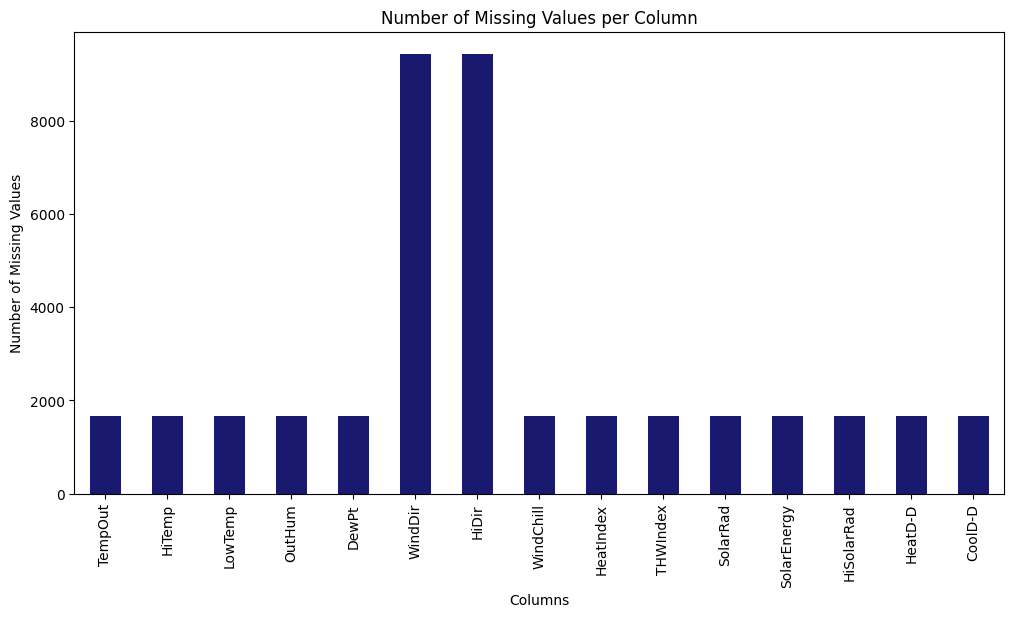

In [ ]:
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()

plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].plot(kind='bar', color='#191970')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

numerical_stats = df.describe().T
modes = df.select_dtypes(include=['number']).mode().iloc[0]
numerical_stats['mode'] = modes
numerical_stats.reset_index(inplace=True)
numerical_stats.rename(columns={'index': 'Column'}, inplace=True)
numerical_stats = numerical_stats[numerical_stats['Column'] != 'Date']

print(numerical_stats)

          Column    count        mean     min     25%    50%     75%     max         std     mode
1          Month  69480.0    6.030656     1.0     3.0    6.0     9.0    12.0    3.167577    5.000
2           Hour  69480.0   11.501281     0.0     6.0   11.5    18.0    23.0    6.922881    1.000
3        TempOut  67809.0   12.386438    -2.3     8.3   12.4    16.0    32.8      5.2947   13.300
4         HiTemp  67819.0   12.609655    -2.3     8.6   12.6    16.3    32.9     5.34754   13.300
5        LowTemp  67819.0   12.169709    -2.4     8.2   12.2    15.8    32.2    5.242053   13.300
6         OutHum  67810.0   80.816237    29.0    73.0   85.0    91.0    99.0    13.41961   93.000
7          DewPt  67809.0    8.903104    -3.4     5.7    9.1    12.0    20.7    4.145799    9.300
8      WindSpeed  69480.0    1.633679     0.0     0.0    1.0     3.0    18.0    2.022863    0.000
9        WindRun  69480.0     0.81683     0.0     0.0    0.5     1.5     9.0    1.011436    0.000
10       HiSpeed  69

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
percentile_98 = numerical_df.quantile(0.98)
outliers_98 = (numerical_df > percentile_98).sum()

columns = outliers_98.index.tolist()
counts = outliers_98.values.tolist()

data = []
for i in range(0, len(columns), 2):
    row = [
        columns[i], counts[i],
        columns[i + 1] if i + 1 < len(columns) else None,
        counts[i + 1] if i + 1 < len(counts) else None,
    ]
    data.append(row)

result_df = pd.DataFrame(data, columns=["Name", "Count", "Name", "Count"])

print(result_df)

            Name  Count         Name  Count
0          Month      0         Hour      0
1        TempOut   1290       HiTemp   1344
2        LowTemp   1280       OutHum    327
3          DewPt   1258    WindSpeed   1081
4        WindRun   1081      HiSpeed   1175
5      WindChill   1290    HeatIndex   1296
6       THWIndex   1296          Bar   1366
7           Rain    913     RainRate   1083
8       SolarRad   1351  SolarEnergy   1351
9     HiSolarRad   1341      HeatD-D   1319
10       CoolD-D   1333       InTemp   1365
11         InHum   1216        InDew   1377
12        InHeat   1383        InEMC   1295
13  InAirDensity   1326           ET   1268
14      WindSamp     10       WindTx    711
15     ISSRecept      0       ArcInt      0


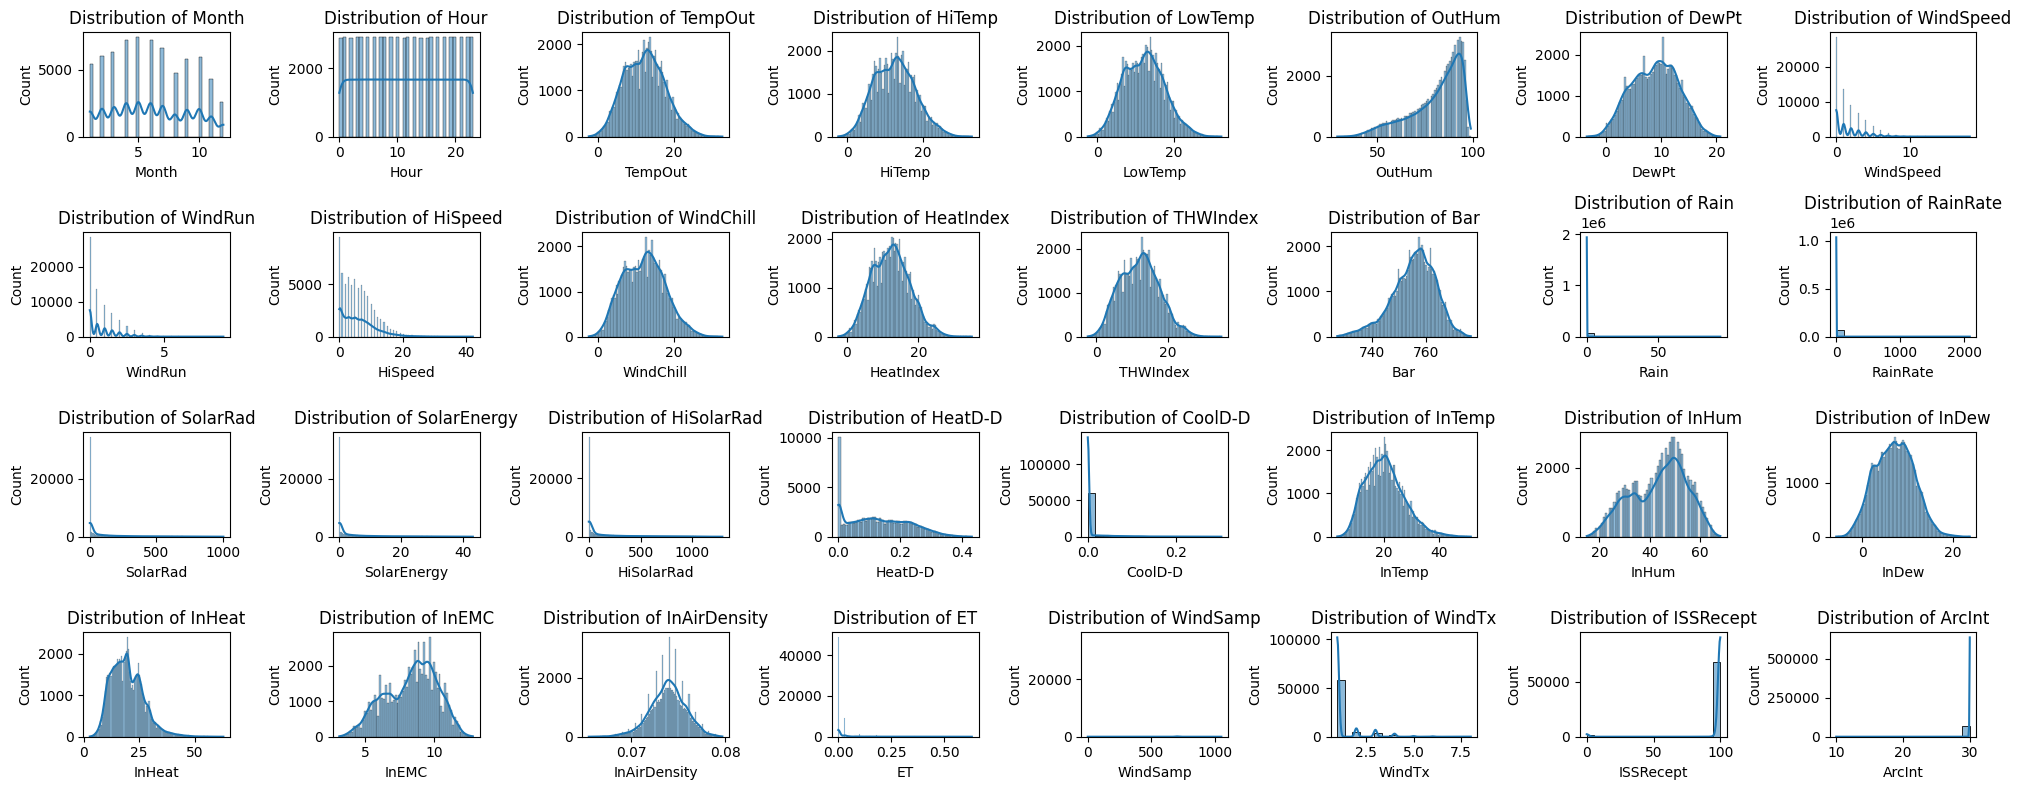

In [ ]:
import seaborn as sns

numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns[numerical_columns != 'Date']

n_cols = 8
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols != 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 2*n_rows))
axes = axes.flatten()

for idx, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')

for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

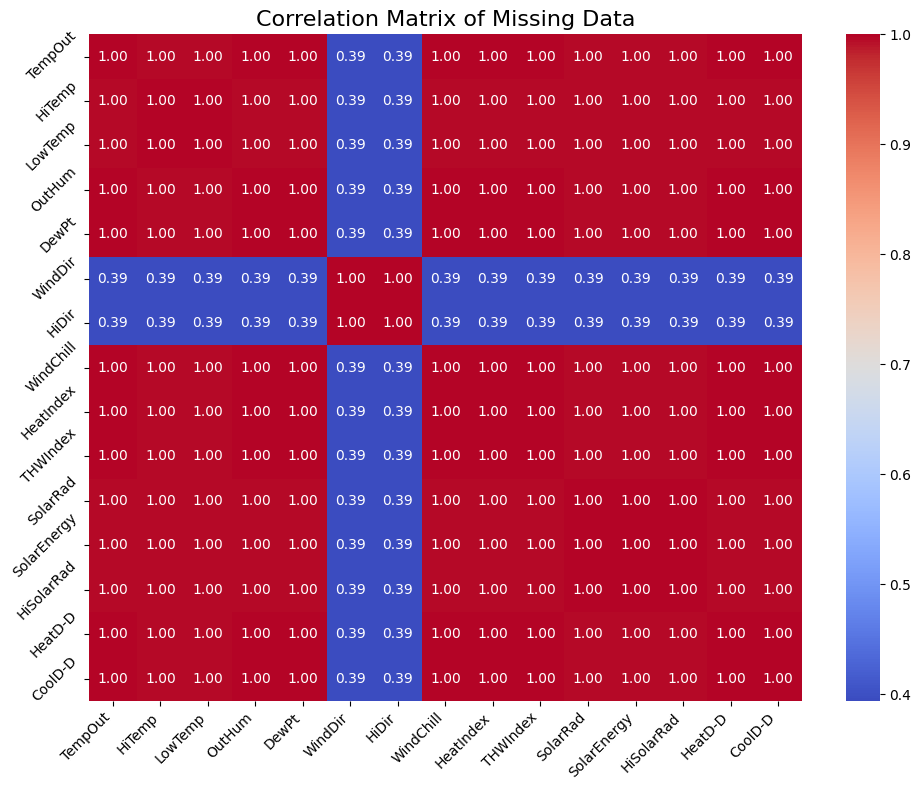

In [ ]:
columns_to_check = ['TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindDir',
                    'HiDir', 'WindChill', 'HeatIndex', 'THWIndex', 'SolarRad',
                    'SolarEnergy', 'HiSolarRad', 'HeatD-D', 'CoolD-D']
missing_data_df = df[columns_to_check].isnull()
correlation_matrix = missing_data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title("Correlation Matrix of Missing Data", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
correlation_columns = ['TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt',
                       'WindChill', 'HeatIndex', 'THWIndex', 'SolarRad',
                      'SolarEnergy', 'HiSolarRad', 'HeatD-D', 'CoolD-D']

df = df.dropna(subset=correlation_columns, how='any')

na_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with N/A values: {na_rows}")

Number of rows with N/A values: 7768


In [ ]:
df.loc[:, 'WindDir'] = df['WindDir'].fillna('Unknown')
df.loc[:, 'HiDir'] = df['HiDir'].fillna('Unknown')

na_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with N/A values: {na_rows}")

Number of rows with N/A values: 0


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

print(f"Train Data: {train_data.shape}")
print(f"Test Data: {test_data.shape}")

Train Data: (47462, 37)
Test Data: (20341, 37)


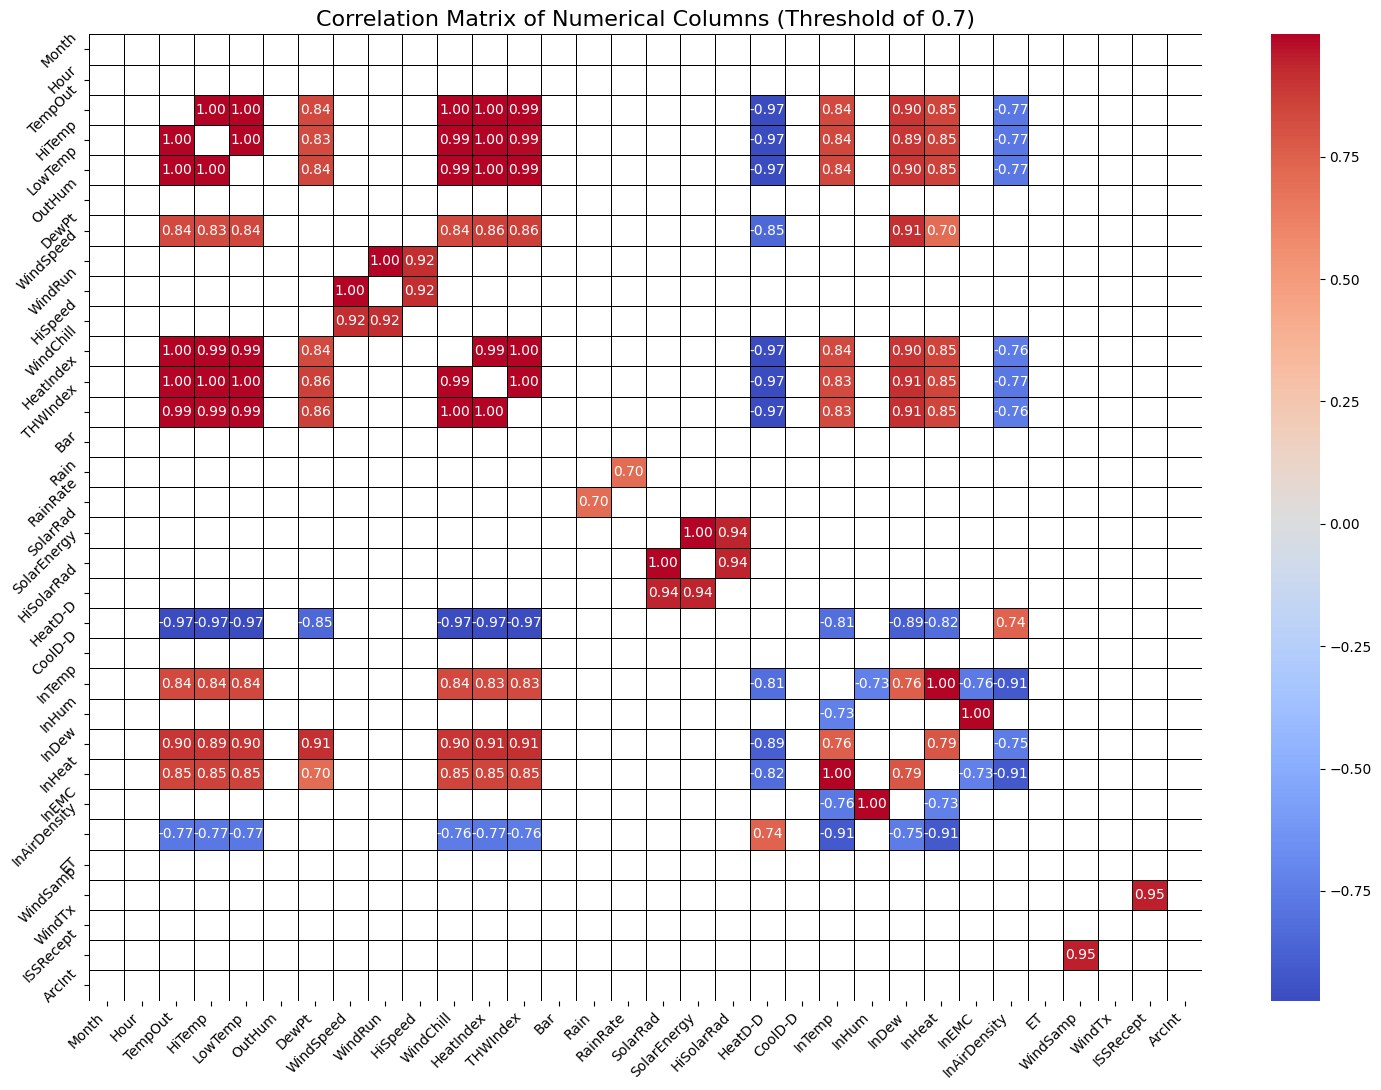

In [ ]:
import numpy as np

numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

threshold = 0.7

mask = correlation_matrix.abs() < threshold

np.fill_diagonal(mask.values, True)

plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            mask=mask,
            linewidths=0.5, linecolor='black')
plt.title("Correlation Matrix of Numerical Columns (Threshold of 0.7)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
columns_to_remove = ['HiTemp', 'LowTemp', 'WindChill', 'HeatIndex', 'THWIndex', 'WindRun',
                     'DewPt', 'HeatD-D', 'InTemp', 'InDew', 'InHeat', 'InAirDensity',
                     'HiSpeed', 'HiDir', 'SolarRad', 'HiSolarRad', 'InEMC', 'InAirDensity',
                     'ISSRecept']

df.drop(columns=columns_to_remove, inplace=True)

print(df.head())

   Site       Date  Month      Time  Hour  TempOut  OutHum  WindSpeed WindDir    Bar  Rain  RainRate  SolarEnergy  CoolD-D  InHum    ET  WindSamp  WindTx  ArcInt
0  YMCA 2014-01-07      1  14:30:00    14     10.6    84.0          5     WNW  747.8   0.0       0.0         1.38      0.0     50  0.00       385       1      30
1  YMCA 2014-01-07      1  15:00:00    15     10.7    83.0          6     WNW  748.0   0.0       0.0         0.86      0.0     50  0.03       702       1      30
2  YMCA 2014-01-07      1  15:30:00    15     10.7    81.0          6       W  747.9   0.0       0.0         0.95      0.0     50  0.00       703       1      30
3  YMCA 2014-01-07      1  16:00:00    16     10.4    82.0          5      NW  748.2   0.0       0.0         0.34      0.0     50  0.03       702       1      30
4  YMCA 2014-01-07      1  16:30:00    16     10.3    84.0          5     WNW  748.4   0.0       0.0         0.00      0.0     50  0.00       703       1      30


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

df.drop(columns=['Date'], inplace=True)
df.drop(columns=['Time'], inplace=True)

df = df[['Site', 'Day', 'Month', 'Year', 'TempOut', 'OutHum', 'WindSpeed', 'WindDir',
       'Bar', 'Rain', 'RainRate', 'SolarEnergy', 'CoolD-D', 'InHum', 'ET',
       'WindSamp', 'WindTx', 'ArcInt']]

In [ ]:
print(df.columns)
df.head()

Index(['Site', 'Day', 'Month', 'Year', 'TempOut', 'OutHum', 'WindSpeed', 'WindDir', 'Bar', 'Rain', 'RainRate', 'SolarEnergy', 'CoolD-D', 'InHum', 'ET', 'WindSamp', 'WindTx', 'ArcInt'], dtype='object')


,Site,Day,Month,Year,TempOut,OutHum,WindSpeed,WindDir,Bar,Rain,RainRate,SolarEnergy,CoolD-D,InHum,ET,WindSamp,WindTx,ArcInt
0,YMCA,7,1,2014,10.6,84.0,5,WNW,747.8,0.0,0.0,1.38,0.0,50,0.00,385,1,30
1,YMCA,7,1,2014,10.7,83.0,6,WNW,748.0,0.0,0.0,0.86,0.0,50,0.03,702,1,30
2,YMCA,7,1,2014,10.7,81.0,6,W,747.9,0.0,0.0,0.95,0.0,50,0.00,703,1,30
3,YMCA,7,1,2014,10.4,82.0,5,NW,748.2,0.0,0.0,0.34,0.0,50,0.03,702,1,30
4,YMCA,7,1,2014,10.3,84.0,5,WNW,748.4,0.0,0.0,0.00,0.0,50,0.00,703,1,30


In [ ]:
print(df.columns)
print(len(df.columns))

Index(['Site', 'Day', 'Month', 'Year', 'TempOut', 'OutHum', 'WindSpeed', 'WindDir', 'Bar', 'Rain', 'RainRate', 'SolarEnergy', 'CoolD-D', 'InHum', 'ET', 'WindSamp', 'WindTx', 'ArcInt'], dtype='object')
18


In [ ]:
df['WindDir'].unique()

array(['WNW', 'W', 'NW', 'WSW', 'SW', 'N', 'NNE', 'NNW', 'Unknown', 'NE',
       'SSE', 'SSW', 'S', 'SE', 'E', 'ENE', 'ESE'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['WindDir'])

print(df)

                Site  Day  Month  Year  TempOut  OutHum  WindSpeed    Bar   Rain  RainRate  SolarEnergy  CoolD-D  InHum    ET  WindSamp  WindTx  ArcInt  WindDir_E  WindDir_ENE  WindDir_ESE  WindDir_N  WindDir_NE  WindDir_NNE  WindDir_NNW  WindDir_NW  WindDir_S  WindDir_SE  WindDir_SSE  WindDir_SSW  WindDir_SW  WindDir_Unknown  WindDir_W  WindDir_WNW  WindDir_WSW
0               YMCA    7      1  2014     10.6    84.0          5  747.8   0.00       0.0         1.38    0.000     50  0.00       385       1      30      False        False        False      False       False        False        False       False      False       False        False        False       False            False      False         True        False
1               YMCA    7      1  2014     10.7    83.0          6  748.0   0.00       0.0         0.86    0.000     50  0.03       702       1      30      False        False        False      False       False        False        False       False      False       Fal

In [ ]:
print(df.columns)

Index(['Site', 'Day', 'Month', 'Year', 'TempOut', 'OutHum', 'WindSpeed', 'Bar', 'Rain', 'RainRate', 'SolarEnergy', 'CoolD-D', 'InHum', 'ET', 'WindSamp', 'WindTx', 'ArcInt', 'WindDir_E', 'WindDir_ENE', 'WindDir_ESE', 'WindDir_N', 'WindDir_NE', 'WindDir_NNE', 'WindDir_NNW', 'WindDir_NW', 'WindDir_S', 'WindDir_SE', 'WindDir_SSE', 'WindDir_SSW', 'WindDir_SW', 'WindDir_Unknown', 'WindDir_W', 'WindDir_WNW', 'WindDir_WSW'], dtype='object')


In [ ]:
df = pd.get_dummies(df, columns=['Site'], prefix='Site')

print(df)

       Day  Month  Year  TempOut  OutHum  WindSpeed    Bar   Rain  RainRate  SolarEnergy  CoolD-D  InHum    ET  WindSamp  WindTx  ArcInt  WindDir_E  WindDir_ENE  WindDir_ESE  WindDir_N  WindDir_NE  WindDir_NNE  WindDir_NNW  WindDir_NW  WindDir_S  WindDir_SE  WindDir_SSE  WindDir_SSW  WindDir_SW  WindDir_Unknown  WindDir_W  WindDir_WNW  WindDir_WSW  Site_Easthill Road  Site_Elm Crescent  Site_Forest Road  Site_Maple Drive East  Site_YMCA
0        7      1  2014     10.6    84.0          5  747.8   0.00       0.0         1.38    0.000     50  0.00       385       1      30      False        False        False      False       False        False        False       False      False       False        False        False       False            False      False         True        False               False              False             False                  False       True
1        7      1  2014     10.7    83.0          6  748.0   0.00       0.0         0.86    0.000     50  0.03       7

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_normalise = ['TempOut', 'OutHum', 'WindSpeed', 'Bar', 'Rain',
                        'RainRate', 'CoolD-D', 'InHum', 'ET', 'WindSamp',
                        'WindTx', 'ArcInt']

scaler = StandardScaler()

df[columns_to_normalise] = scaler.fit_transform(df[columns_to_normalise])

print(df)

       Day  Month  Year   TempOut    OutHum  WindSpeed       Bar        Rain   RainRate  SolarEnergy   CoolD-D     InHum        ET   WindSamp    WindTx    ArcInt  WindDir_E  WindDir_ENE  WindDir_ESE  WindDir_N  WindDir_NE  WindDir_NNE  WindDir_NNW  WindDir_NW  WindDir_S  WindDir_SE  WindDir_SSE  WindDir_SSW  WindDir_SW  WindDir_Unknown  WindDir_W  WindDir_WNW  WindDir_WSW  Site_Easthill Road  Site_Elm Crescent  Site_Forest Road  Site_Maple Drive East  Site_YMCA
0        7      1  2014 -0.337292  0.237245   1.637479 -0.942964   -0.037860  -0.021618         1.38 -0.293004  0.572161 -0.412977 -32.058189 -0.384647  0.022726      False        False        False      False       False        False        False       False      False       False        False        False       False            False      False         True        False               False              False             False                  False       True
1        7      1  2014 -0.318404  0.162729   2.129812 -0.918341   -

In [ ]:
df.head()

,Day,Month,Year,TempOut,OutHum,WindSpeed,Bar,Rain,RainRate,SolarEnergy,CoolD-D,InHum,ET,WindSamp,WindTx,ArcInt,WindDir_E,WindDir_ENE,WindDir_ESE,WindDir_N,WindDir_NE,WindDir_NNE,WindDir_NNW,WindDir_NW,WindDir_S,WindDir_SE,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_Unknown,WindDir_W,WindDir_WNW,WindDir_WSW,Site_Easthill Road,Site_Elm Crescent,Site_Forest Road,Site_Maple Drive East,Site_YMCA
0,7,1,2014,-0.337292,0.237245,1.637479,-0.942964,-0.03786,-0.021618,1.38,-0.293004,0.572161,-0.412977,-32.058189,-0.384647,0.022726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,7,1,2014,-0.318404,0.162729,2.129812,-0.918341,-0.03786,-0.021618,0.86,-0.293004,0.572161,-0.040853,0.064874,-0.384647,0.022726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,7,1,2014,-0.318404,0.013697,2.129812,-0.930653,-0.03786,-0.021618,0.95,-0.293004,0.572161,-0.412977,0.166208,-0.384647,0.022726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,7,1,2014,-0.375070,0.088213,1.637479,-0.893718,-0.03786,-0.021618,0.34,-0.293004,0.572161,-0.040853,0.064874,-0.384647,0.022726,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,7,1,2014,-0.393959,0.237245,1.637479,-0.869095,-0.03786,-0.021618,0.00,-0.293004,0.572161,-0.412977,0.166208,-0.384647,0.022726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [ ]:
original = '/content/drive/MyDrive/Portfolio/Solar Panel Analytics/data_versions/original.parquet'
df.to_parquet(original, index=False)